# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [18]:
# Import libraries
import pandas as pd
import numpy as np

# Scaling modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Ensures the same random data is used each time you execute the code
np.random.seed(0)

In [12]:
# Read in the data set
ames_df = pd.read_csv('ames.csv', index_col=False)
ames_df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [19]:
# Clean and pre-process the data if neccessary
# 1. Drop columns not included in your list of independent variables.
columns = ["Sale_Price", "Gr_Liv_Area", "Garage_Area"]
ames_df = ames_df[columns]

# 2. Check for missing values
missing_values = ames_df.isnull().sum()
missing_values 

Sale_Price     0
Gr_Liv_Area    0
Garage_Area    0
dtype: int64

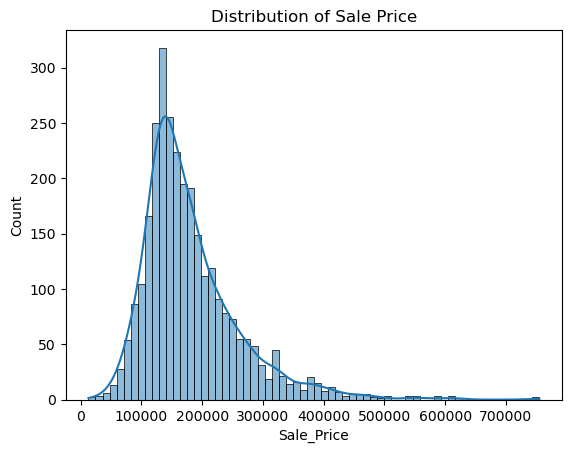

Sale_Price     1.000000
Gr_Liv_Area    0.706780
Garage_Area    0.640138
Name: Sale_Price, dtype: float64


In [ ]:
# Explore the data with histograms and correlation matrices

# Histogram of Sale Price
sns.histplot(ames_df['Sale_Price'], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

# Correlation matrix for the data
correlation_matrix = ames_df.corr()
correlation_matrix['Sale_Price'].sort_values(ascending=False)


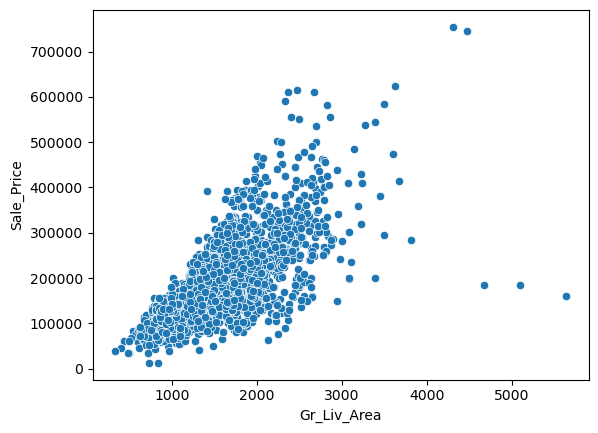

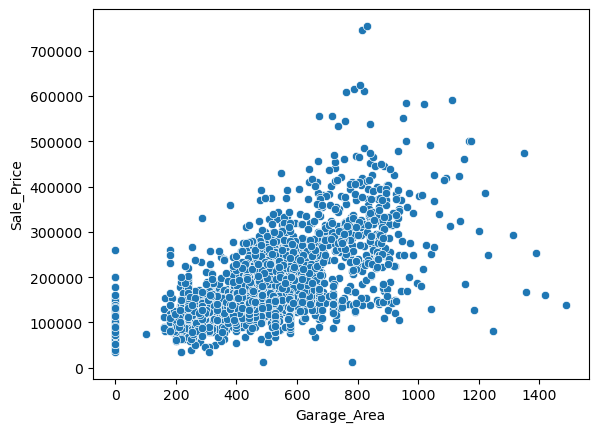

In [ ]:
# Split the independent variables from the dependent variable
X = ames_df.drop(columns=["Sale_Price"])
y = ames_df["Sale_Price"]

# Explore relationships between the independent and dependent variables
sns.scatterplot(x='Gr_Liv_Area', y='Sale_Price', data=ames_df)
plt.show()

sns.scatterplot(x='Garage_Area', y='Sale_Price', data=ames_df)
plt.show()

In [48]:
# Build a multiple linear regression model using independent variables

# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X,
                    y, test_size=0.25, random_state=0)

# Create an empty linear regression model
multi_lin_model = LinearRegression()

# Create the model using fit(X,y)
multi_lin_model.fit(X_train,y_train)

# Get intercept and coefficients of the trained model
multi_lin_model.intercept_, multi_lin_model.coef_


(-11839.590993580583, array([ 84.39386699, 141.00299469]))

In [53]:
# Generate predictions for the test set
predictions = multi_lin_model.predict(X_test)

In [50]:
# Evaluate the model
# Computing the mean squared error (MSE)
mse_values = mean_squared_error(y_test, predictions)
# Computing the root mean squared error (RMSE)
rmse_values = np.sqrt(mse_values)

mse_values, rmse_values

(2351014153.801563, 48487.257643648634)

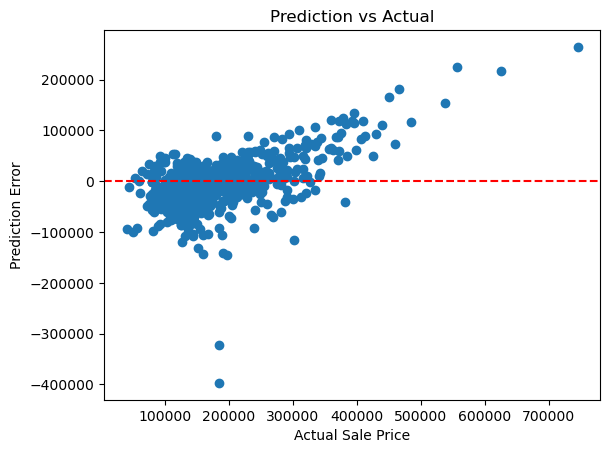

In [54]:
# Plot the errors
errors = y_test - predictions
plt.scatter(y_test, errors)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Prediction Error")
plt.title("Prediction vs Actual")
plt.show()


In [56]:
# Print the coefficients
coef_df = pd.DataFrame({
    'Feature': ['Gr_Liv_Area', 'Garage_Area'],
    'Coefficient': multi_lin_model.coef_
})
coef_df


,Feature,Coefficient
0,Gr_Liv_Area,84.393867
1,Garage_Area,141.002995


**Interpret coefficients in the context of the prediction:**
For each additional square foot of living area, we predict the Sale Price will increase by 84.39 USD, holding garage size constant.

For every additional square foot of Garage area, the predicted sale price will increases by $141, when holding ground floor living area constant. 

### Summarise findings
**From Exploratory data analysis:**
The correlation of the living area and price is Gr_Liv_Area = 0.706780 meaning a strong positive correlation such that larger living ares have increased sale prices. The correlation of the garage area and sale price is Garage_Area = 0.640138 which is still a positive correlation, but not a very strong one; such that a garage with a large area does have higher sale prices.

**Averages**
Average sale price = $180796.06 

**From the model performance:**
The RMSE of 48487.25 means on average, the model’s predictions are off by about $48,487 from the true sale prices.
